# <center><font color='red'>4 - CELL SEGMENTATION</font></center>

### <center><font color='orange'>AUTHOR: Diogo Vieira</font></center>

-------------------------------------------

### <center><font color='grey'>Imports</font></center>

**!** **CHANGE KERNEL**

In [1]:
from framework.importing import *
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from roipoly import RoiPoly
import pickle
import cv2
#from framework.manual_segmentation import roi_selector

print('📚 All libraries successfully imported **(for ROI selection)** 📚')

📚 All libraries successfully imported **(for ROI selection)** 📚


### <center><font color='grey'>Directories</font></center>

In [9]:
def roi_selector(data,img_id,ROIsDF):
    global ROI
    import copy
    print('🔎')
    
    if type(ROIsDF) != pd.core.frame.DataFrame:
        ROIsDF    = pd.DataFrame(columns = ['Name','Index','Label','ROImask'])
       
    ROIsDF_ = copy.deepcopy(ROIsDF)
    
    # Get image
    if '3D' in data.keys():
        flag = '3D'
        mult = np.stack([1.8*data['3D']['Image'][12]/np.max(data['3D']['Image'][12]),1.8*data['3D']['Image'][11]/np.max(data['3D']['Image'][11]),1*data['3D']['Image'][10]/np.max(data['3D']['Image'][10])],axis=2)
    
    if 'CYTO_DECONV' in data.keys():
        flag = 'RGB'
        img        = data['RGB']['Image'][img_id]
        tmp        = copy.deepcopy(img)
        tmp[:,:,0] = 0
        grey       = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)

        #mult = np.stack([1.3*(grey / np.max(grey)),1.3*sk*(grey / np.max(grey)), np.zeros_like(sk)],axis=2)
        #mult = np.stack([0.9*(grey / np.max(grey)),sk*(grey / np.max(grey)), 0.5 * (OriginalDF['Image'][img_id][:,:,0] / np.max(OriginalDF['Image'][img_id][:,:,0]))],axis=2)
        #mult = np.stack([1.5*(grey / np.max(grey)),sk, 0.2 * (data['RGB']['Image'][img_id][:,:,0] / np.max(data['RGB']['Image'][img_id][:,:,0]))],axis=2)
        mult = grey
    
    
        
        
    try:
        while 1:
    #         try:
            plt.close('all')

            # Select ROI QT
            #%matplotlib qt
            fig,ax = plt.subplots(figsize=(30,30))
            #plt.imshow(data.loc[img_id]['Image'])
            plt.imshow(data['CYTO'].loc[img_id]['Image'])
            plt.axis('off')
            
            
            
            # Plot Contours
            #plot_nuclei_contours(CentroidsDF=Centroids,imgIndex=img_id,ax=ax)
            # Define ROI

            ROI = RoiPoly(color='r')
            #ROI.display_roi()
            #global mask,roi_coordinates
            #roi_coordinates = ROI.get_roi_coordinates()
            mask = ROI.get_mask(data['CYTO'].loc[img_id]['Image'])

            # Save ROI
            #new = pd.DataFrame(data = {'Name': [data[flag]['Name'][img_id]],'Index': [img_id], 'Label': [data[flag]['Label'][img_id]], 'ROImask': [mask]})
            new = pd.DataFrame(data = {'Name': [data['CYTO']['Name'][img_id]],'Index': [img_id], 'Label': [data['CYTO']['Label'][img_id]], 'ROImask': [mask]})

            ROIsDF_ = pd.concat([ROIsDF_, new], axis=0,ignore_index=True)


            plt.show()
    except Exception as e:
        print('Window closed')
        print(e)
        return ROIsDF_

In [2]:
### DATASET #1 (2D)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"
# options   = ["RGB","CYTO_DECONV","NUCL_DECONV"]

### DATASET #2 (3D)
#folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 3D"
#options   = ["3D"]

### DATASET #3 (Soraia)
#folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Soraia"
#options   = ["3D"]

### DATASET #4 (Inês)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Ines"
#options     = []

### DATASET #7 (EMBC)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\EMBC"
# options     = ["CYTO"]
# denominator  = label_EMBC

### DATASET #8 (p28)
folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\p28"
options     = ["CYTO"]
denominator = label_p28


data = init_import(folder,options,label_p28)
#data['NUCL_PRE'] = pd.read_pickle(folder + "\\NUCL_PRE\\NUCL_PRE.pkl") # pd.read_pickle(os.getcwd() + "\\NUCL_PRE_2D_StarDist.pkl") #
#data['CYTO_PRE'] = pd.read_pickle(folder + "\\CYTO_PRE\\CYTO_PRE.pkl") 

Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
Using default voxel height (z = 1)
>>> [CYTO] added.


In [3]:
def label_cardiomyocytes(name):
    number = int(name.split('_')[-1][:-4])
    label1,label2,label3 = str(name.split('_')[1]),str(name.split('_')[2]),str(name.split('_')[3:6])
    
    return number,label1,label2,label3

def init_import(folder, denominator):
    CardioDF = pd.DataFrame(columns=['Path','Name','Label1','Label2','Label3','Image'])
    for img in os.listdir(folder):
        path     = folder + "\\" + img
        image    = cv2.imread(path,-1)[:,:,0] 
        new      = pd.DataFrame(data={'Path': [path],'Name': [img], 'Label1': [denominator(img)[1]],'Label2': [denominator(img)[2]], 'Label3': [denominator(img)[3]] ,'Image': [image]}, index = [denominator(img)[0]])
        CardioDF = pd.concat([CardioDF, new], axis=0,ignore_index=False)
        
    return CardioDF

folder    = 'C:\\Users\\diogo\\OneDrive - Universidade de Lisboa\\Ambiente de Trabalho\\WORK\\Cardiomyocytes\\data'
data      = init_import(folder,label_cardiomyocytes)


In [4]:
data['CYTO']

,Path,Name,Label,Image,Resolution
1,C:\Users\diogo\OneDrive - Universidade de Lisb...,gengivalfibroblast_1.tif,gengivalfibroblast,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","(1, 1.0, 1.0)"


In [3]:
data['CYTO']

,Path,Name,Label,Image,Resolution
Actina_29jan24_MCF7_Control_1000_2_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_Control_1000_2_z0_ch00.tif,1000,"[[3, 14, 11, 5, 16, 5, 17, 8, 15, 26, 12, 15, ...","(1, 1.6e-05, 1.6e-05)"
Actina_29jan24_MCF7_Control_1000_3_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_Control_1000_3_z0_ch00.tif,1000,"[[21, 11, 15, 7, 13, 21, 22, 15, 13, 10, 22, 1...","(1, 1.6e-05, 1.6e-05)"
Actina_29jan24_MCF7_Control_1000_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_Control_1000_z0_ch00.tif,1000,"[[7, 7, 19, 22, 16, 10, 6, 9, 8, 13, 8, 12, 10...","(1, 1.6e-05, 1.6e-05)"
Actina_29jan24_MCF7_control_500_2_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_control_500_2_z0_ch00.tif,500,"[[2, 9, 2, 5, 4, 3, 8, 4, 13, 9, 3, 4, 9, 3, 5...","(1, 1.6e-05, 1.6e-05)"
Actina_29jan24_MCF7_control_500_3_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_control_500_3_z0_ch00.tif,500,"[[2, 3, 2, 2, 2, 7, 6, 8, 3, 8, 3, 4, 6, 3, 6,...","(1, 1.6e-05, 1.6e-05)"
Actina_29jan24_MCF7_control_500_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_control_500_z0_ch00.tif,500,"[[9, 21, 7, 10, 8, 7, 3, 20, 3, 7, 14, 12, 8, ...","(1, 1.6e-05, 1.6e-05)"
Actina_29jan24_MCF7_p28_100_1000_2_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_p28_100_1000_2_z0_ch00.tif,100,"[[14, 17, 11, 7, 11, 21, 3, 22, 18, 17, 13, 15...","(1, 1.5e-05, 1.5e-05)"
Actina_29jan24_MCF7_p28_100_1000_3_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_p28_100_1000_3_z0_ch00.tif,100,"[[7, 6, 16, 11, 11, 11, 12, 10, 16, 31, 16, 7,...","(1, 1.6e-05, 1.6e-05)"
Actina_29jan24_MCF7_p28_100_1000_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_p28_100_1000_z0_ch00.tif,100,"[[8, 11, 12, 6, 9, 7, 8, 14, 7, 8, 4, 22, 13, ...","(1, 1.6e-05, 1.6e-05)"
Actina_29jan24_MCF7_p28_25_1000_2_z0,C:\Users\diogo\OneDrive - Universidade de Lisb...,Actina_29jan24_MCF7_p28_25_1000_2_z0_ch00.tif,25,"[[35, 41, 45, 41, 56, 37, 54, 37, 24, 13, 16, ...","(1, 1.6e-05, 1.6e-05)"


In [34]:
%matplotlib qt
imagem_id = data['CYTO'].index[16]
ROIs2 = roi_selector(data,imagem_id,ROIs2)

IndexError: index 16 is out of bounds for axis 0 with size 16

In [6]:
imagem_id

'Actina_29jan24_MCF7_Control_1000_2_z0'

In [35]:
ROIs2

,Name,Index,Label,ROImask
0,Actina_29jan24_MCF7_Control_1000_2_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_2_z0,1000,"[[False, False, False, False, False, False, Fa..."
1,Actina_29jan24_MCF7_Control_1000_2_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_2_z0,1000,"[[False, False, False, False, False, False, Fa..."
2,Actina_29jan24_MCF7_Control_1000_2_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_2_z0,1000,"[[False, False, False, False, False, False, Fa..."
3,Actina_29jan24_MCF7_Control_1000_2_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_2_z0,1000,"[[False, False, False, False, False, False, Fa..."
4,Actina_29jan24_MCF7_Control_1000_2_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_2_z0,1000,"[[False, False, False, False, False, False, Fa..."
5,Actina_29jan24_MCF7_Control_1000_2_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_2_z0,1000,"[[False, False, False, False, False, False, Fa..."
6,Actina_29jan24_MCF7_Control_1000_3_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_3_z0,1000,"[[False, False, False, False, False, False, Fa..."
7,Actina_29jan24_MCF7_Control_1000_3_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_3_z0,1000,"[[False, False, False, False, False, False, Fa..."
8,Actina_29jan24_MCF7_Control_1000_3_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_3_z0,1000,"[[False, False, False, False, False, False, Fa..."
9,Actina_29jan24_MCF7_Control_1000_z0_ch00.tif,Actina_29jan24_MCF7_Control_1000_z0,1000,"[[False, False, False, False, False, False, Fa..."


In [27]:
%matplotlib qt
ROIs2 = roi_selector(data['3D'],12,None,options)

KeyError: '3D'

In [7]:
ROIs2

,Name,Index,Label,ROImask
0,MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif,12,2245,"[[False, False, False, False, False, False, Fa..."
1,MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif,12,2245,"[[False, False, False, False, False, False, Fa..."


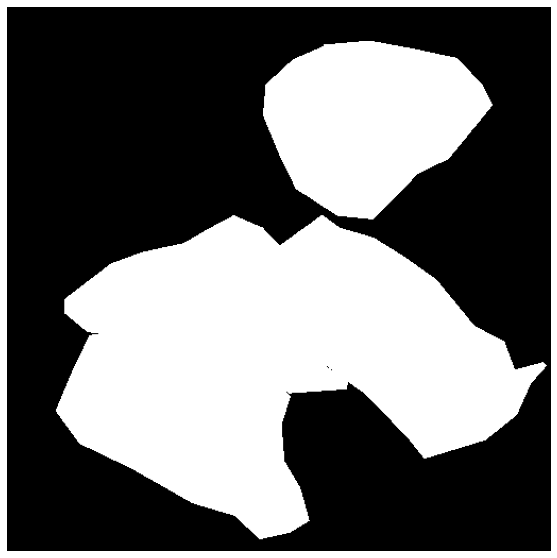

In [26]:
%matplotlib inline
img_id = imagem_id
df = ROIs2[ROIs2['Index']==img_id]

i = 0
for index,row in df.iterrows():
    if i == 0:
        auxx = row['ROImask']
        i = 1
    else:
        auxx = auxx + row['ROImask']

fig,ax = plt.subplots(figsize=(10,10))
plt.imshow(auxx,cmap='gray')
#plot_nuclei_contours(CentroidsDF=Centroids,imgIndex=img_id,ax=ax)
plt.axis('off')
# for index,row in Centroids[img_id].iterrows():
#     if type(img_id) != int:
#         plt.plot(row['Centroid'][1],row['Centroid'][0],'o',color='r',markersize=7,zorder=5)
#     else:
#         plt.plot(row['Centroid'][1],row['Centroid'][0],'o',color='b',markersize=7,zorder=5)
#plt.savefig(".//maski.png",format='png',transparent=True,bbox_inches='tight',dpi=500)
plt.show()
        
#for cell in df['ROImask']:
#    analyze_cell([texture, dropdown_image.value],mask,[slider_thr.value,slider_linelen.value,slider_linegap.value],Centroids[dropdown_image.value],next(counter),DeconvDF,NucleiDeconvDF,True)

**DELETE LAST ROW**

In [25]:
ROIs2.drop(ROIs2.tail(1).index,inplace=True)
#OU 
#ROIs = ROIs[:-1]

MULTIROI EXPERIMENT

In [ ]:
import logging
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from roipoly import MultiRoi
%matplotlib qt

logging.basicConfig(format='%(levelname)s ''%(processName)-10s : %(asctime)s ''%(module)s.%(funcName)s:%(lineno)s %(message)s',level=logging.INFO)

img_id = 12

ROIsDF    = pd.DataFrame(columns = ['Name','Index','Label','ROImask'])
if type(ROIsDF) != pd.core.frame.DataFrame:
    ROIsDF    = pd.DataFrame(columns = ['Name','Index','Label','ROImask'])

# Create image
img = data['3D']['Image'][img_id]
mult = np.stack([1.8*data['3D']['Image'][img_id]/np.max(data['3D']['Image'][img_id]),1.8*data['3D']['Image'][img_id-1]/np.max(data['3D']['Image'][img_id-1]),1*data['3D']['Image'][img_id-2]/np.max(data['3D']['Image'][img_id-2])],axis=2)

# Show the image
fig = plt.figure(figsize=(30,30))
plt.imshow(mult, interpolation='nearest', cmap="Greys")
figManager = plt.get_current_fig_manager()
figManager.window.showMaximized()

# Draw multiple ROIs
multiROI = MultiRoi(roi_names=['Cell ' + str(i) for i in range(1,30)])

# Obtain ROIs
roi_names = []
masks = []
for name, roi in multiROI.rois.items():
    masks += [roi.get_mask(img)]
    roi_names += [name]

In [37]:
ROIs2.to_pickle(os.getcwd() + '\\ROIs_p28.pkl')   
print('Save 🥒')

ImportError: Missing optional dependency 'tables'.  Use pip or conda to install tables.